Electric Vehicles Dataset: https://www.kaggle.com/datasets/kkhandekar/quickest-electric-cars-ev-database

Introduction: This dataset contains information on metrics of different models of EVs including speed, efficency, range, and price. The aim of this project is to use this dataset to answer questions that would benefit a potential buyer these questions are as follows. 1. what vehicles have the best range with great efficiency as even if a viecle has a high range it might have poor efficency. 2.what vehicles have the top speed for each of the drive types as buyers may perfer a specific drive type. 3. what vehicles have the fastest charge speed and which have the slowest as buyers may be concerned wil low charge speed.

Methodology: In this Project Numpy and Matplotlib.pyplot will be used to calculate the answers to these questions as well as visualize them. To refine the dataset entries with N/A will be removed to ensure smooth calculations.

In [1]:
import pandas as pd
import numpy as np

In [2]:
Evs = pd.read_csv("/content/Quickestelectriccars-EVDatabase 1.csv")
EV_Name = Evs['Name'].values
Ev_Batt = Evs['Battery size kWh'].values
Ev_Accel = Evs['Acceleration onds'].values
Ev_Top_Speed = Evs['TopSpeed kilometers/h'].values
Ev_Range = Evs['Range kilometers'].values
Ev_Eff = Evs['Efficiency Wh/km'].values
Ev_Fast_Char = Evs['FastChargeSpeed kilometers/h'].values
Ev_Drive = Evs['Drive'].values
Ev_Seats = Evs['NumberofSeats'].values
Ev_Price_Ger = Evs['PriceinGermany'].values
Ev_Price_Uk = Evs['PriceinUK'].values

Q1 what vehicle/s have the best range and efficiency?

In [3]:
norm_range = (Ev_Range - np.min(Ev_Range))/(np.max(Ev_Range)-np.min(Ev_Range))
norm_eff = 1- ((Ev_Eff - np.min(Ev_Eff)) / (np.max(Ev_Eff) - np.min(Ev_Eff)))
results = norm_range + norm_eff
top_Car = np.argmax(results)
print("EV with the best range and efficiency red point:  ", EV_Name[top_Car])


EV with the best range and efficiency red point:   Tesla Roadster 


Vizualization


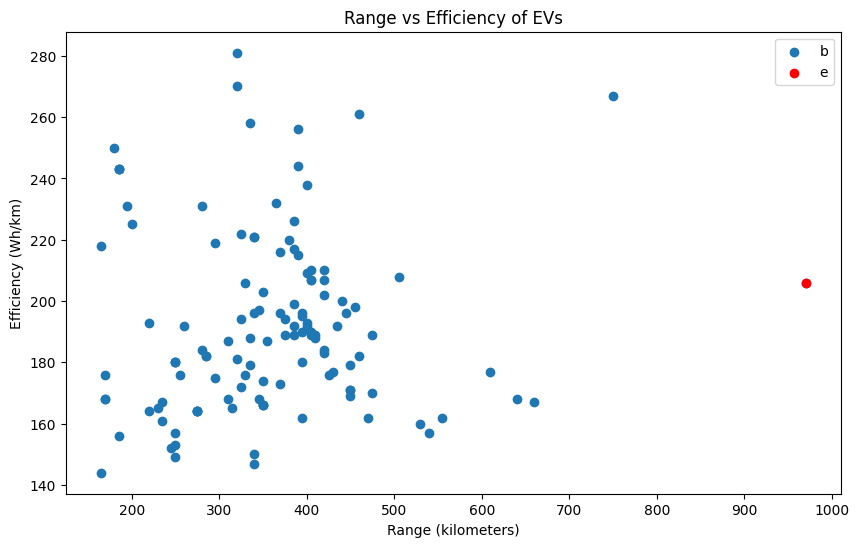

In [4]:
import matplotlib.pyplot as plt
EV_Name = np.array(EV_Name)
Ev_Range = np.array(Ev_Range)
Ev_Eff = np.array(Ev_Eff)

plt.figure(figsize=(10, 6))
plt.scatter(Ev_Range, Ev_Eff)
plt.scatter(Ev_Range[top_Car], Ev_Eff[top_Car], color='red')

plt.xlabel('Range (kilometers)')
plt.ylabel('Efficiency (Wh/km)')
plt.title('Range vs Efficiency of EVs')
plt.legend("best ev")

plt.show()

Q2 what cars have the top speed for each drive type?


In [7]:
sorted_speeds = np.argsort(Ev_Top_Speed)
sorted_speeds = sorted_speeds[::-1]
for i in sorted_speeds:
  if Ev_Drive[sorted_speeds[i]] == "All Wheel Drive":
    all_name = EV_Name[sorted_speeds[i]]
    break
for i in sorted_speeds:
  if Ev_Drive[sorted_speeds[i]] == "Rear Wheel Drive":
    rear_name = EV_Name[sorted_speeds[i]]
    break
for i in sorted_speeds:
  if Ev_Drive[sorted_speeds[i]] == "Front Wheel Drive":
    front_name = EV_Name[sorted_speeds[i]]
    break
print("car with top speed in all wheel drive is ", all_name)
print("car with top speed in rear wheel drive is ", rear_name)
print("car with top speed in front wheel drive is ", front_name)






car with top speed in all wheel drive is  Tesla Roadster 
car with top speed in rear wheel drive is  Porsche Taycan 
car with top speed in front wheel drive is  Renault Megane E-Tech Electric


vizualization


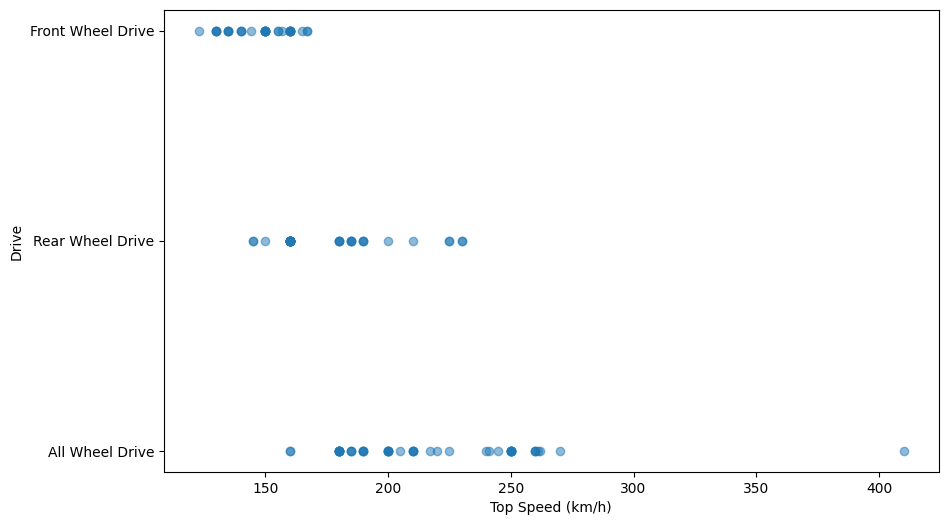

In [8]:

plt.figure(figsize=(10,6))
plt.scatter(Ev_Top_Speed, Ev_Drive, alpha=0.5)
plt.xlabel('Top Speed (km/h)')
plt.ylabel('Drive')
plt.show()

Q3 what is the max min and average charge speed?

In [11]:
max_speed = np.max(Ev_Fast_Char)
min_speed = np.min(Ev_Fast_Char)
avg_speed = np.mean(Ev_Fast_Char)
print(f"Max Charge Speed: {max_speed} km/h belonging to: ", EV_Name[np.argmax(Ev_Fast_Char)])
print(f"Min Charge Speed: {min_speed} km/h belonging to: ", EV_Name[np.argmin(Ev_Fast_Char)])
print(f"Average Charge Speed: {avg_speed} km/h")

Max Charge Speed: 1410 km/h belonging to:  Lucid Air Pure
Min Charge Speed: 150 km/h belonging to:  Lexus UX 300e
Average Charge Speed: 530.0 km/h


Vizualization


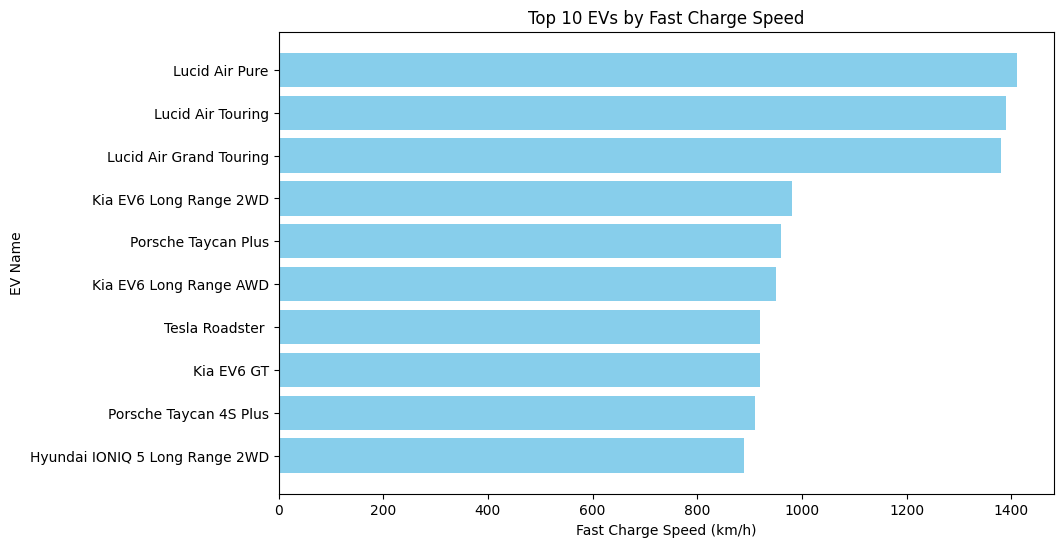

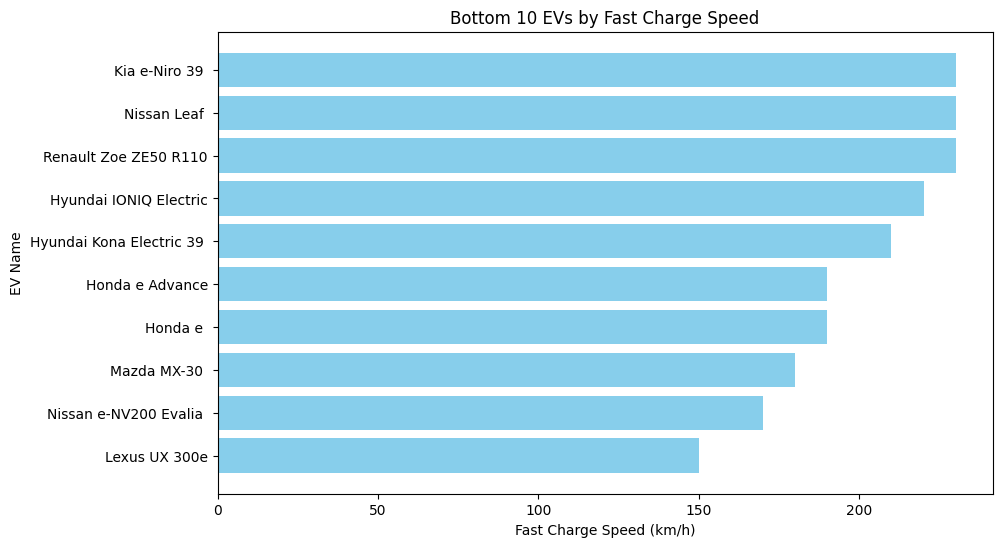

In [12]:
df = pd.DataFrame({'Name': EV_Name, 'FastChargeSpeed': Ev_Fast_Char})

df_sorted = df.sort_values('FastChargeSpeed', ascending=False)
df_top10 = df_sorted.head(10)
df_bottom10 = df_sorted.tail(10)

plt.figure(figsize=(10,6))
plt.barh(df_top10['Name'], df_top10['FastChargeSpeed'], color='skyblue')
plt.xlabel('Fast Charge Speed (km/h)')
plt.ylabel('EV Name')
plt.title('Top 10 EVs by Fast Charge Speed')
plt.gca().invert_yaxis()  # invert the y-axis to have the highest value at the top
plt.show()

plt.figure(figsize=(10,6))
plt.barh(df_bottom10['Name'], df_bottom10['FastChargeSpeed'], color='skyblue')
plt.xlabel('Fast Charge Speed (km/h)')
plt.ylabel('EV Name')
plt.title('Bottom 10 EVs by Fast Charge Speed')
plt.gca().invert_yaxis()  # invert the y-axis to have the highest value at the top
plt.show()